In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy # type: ignore

In [3]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train /255
x_test = x_test /255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [11]:
model = Sequential()

In [12]:

model.add(Conv2D(16, (1,1),1, activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



C:\Users\cgrec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
model.compile('adam',
            loss='categorical_crossentropy',
              metrics=['accuracy','precision', 'recall'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,506 (111.35 KB)

 Trainable params: 28,506 (111.35 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
logdir = 'logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=.02, callbacks=[tensorboard_callback])

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6739 - loss: 1.0995 - val_accuracy: 0.9625 - val_loss: 0.1637
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9539 - loss: 0.1504 - val_accuracy: 0.9700 - val_loss: 0.1272
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9641 - loss: 0.1135 - val_accuracy: 0.9733 - val_loss: 0.1140
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9720 - loss: 0.0874 - val_accuracy: 0.9700 - val_loss: 0.1040
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9749 - loss: 0.0812 - val_accuracy: 0.9700 - val_loss: 0.0926
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9773 - loss: 0.0717 - val_accuracy: 0.9750 - val_loss: 0.0890
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9805 - loss: 0.0637 - val_accuracy: 0.9808 - val_loss: 0.0795
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 

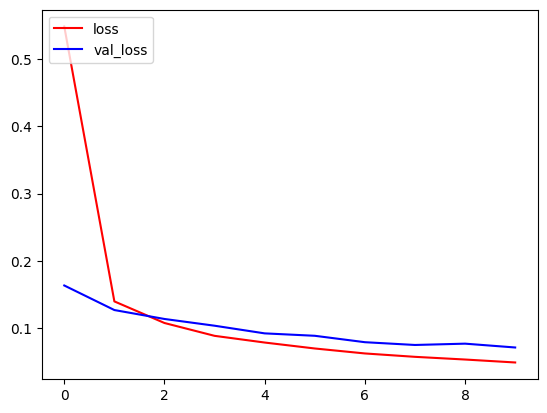

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='red', label = 'loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
plt.legend(loc="upper left")
plt.show()

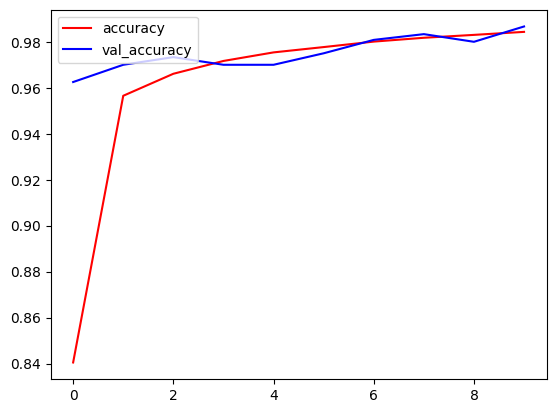

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="red", label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [28]:
acc = model.evaluate(x_test, y_test)
print(f'accuracy: {acc[1]}, Precision: {acc[2]}, Recall: {acc[3]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9765 - loss: 0.0694 - precision: 0.9783 - recall: 0.9760
accuracy: 0.9811000227928162, Precision: 0.982264518737793, Recall: 0.9803000092506409


In [31]:
keras.callbacks.History??

Init signature: keras.callbacks.History()
Source:        
@keras_export("keras.callbacks.History")
class History(Callback):
    """Callback that records events into a `History` object.

    This callback is automatically applied to
    every Keras model. The `History` object
    gets returned by the `fit()` method of models.

    Example:

    >>> model = Sequential([layers.Dense(10)])
    >>> model.compile(SGD(), loss='mse')
    >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
    ...                     epochs=10, verbose=1)
    >>> print(history.params)
    {'verbose': 1, 'epochs': 10, 'steps': 1}
    >>> # check the keys of history object
    >>> print(history.history.keys())
    dict_keys(['loss'])

    """

    def __init__(self):
        super().__init__()
        self.history = {}

    def on_train_begin(self, logs=None):
        self.epoch = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epoch.append(epoch)
        f

In [7]:
from tensorflow.keras.models import load_model
import os as os

In [29]:
model.save(os.path.join('models','idgitclassifiermodel.h5'))


AttributeError: 'History' object has no attribute 'save'

In [9]:
#Reload the model
model = load_model(os.path.join('models','idgitclassifiermodel.h5'))
